In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import preprocessing
from sklearn import model_selection
from sklearn import linear_model
from sklearn import tree
from sklearn import neighbors
from sklearn import naive_bayes
from sklearn import ensemble
from sklearn import cluster
from sklearn import mixture
from sklearn import metrics

import matplotlib.pyplot as plt

from IPython.display import display, HTML
from typing import Callable


pd.set_option('display.max_columns', None)

In [2]:
display(HTML('Train data:'))
X_train_raw = pd.read_csv('data/train.txt', delim_whitespace=True, header=None)
y_train_labels = pd.read_csv('data/train_labels.txt', header=None).iloc[:, 0]
display(X_train_raw.head())
display(HTML(f"Train data shape: {X_train_raw.shape}"))
display(HTML(f"Train labels data length: {len(y_train_labels)}"))

display(HTML('<hr />'))

display(HTML('Test data:'))
X_test_raw = pd.read_csv('data/test.txt', delim_whitespace=True, header=None)
y_test_labels = pd.read_csv('data/test_labels.txt', header=None).iloc[:, 0]
display(X_test_raw.head())
display(HTML(f"Test data shape: {X_test_raw.shape}"))
display(HTML(f"Test labels data length: {len(y_test_labels)}"))

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,-0.567378,-0.744413,0.852947,0.685845,0.814263,-0.965523,-0.999945,-0.999863,-0.994612,-0.994231,-0.987614,-0.943220,-0.407747,-0.679338,-0.602122,0.929294,-0.853011,0.359910,-0.058526,0.256892,-0.224848,0.264106,-0.095246,0.278851,-0.465085,0.491936,-0.190884,0.376314,0.435129,0.660790,0.963396,-0.140840,0.115375,-0.985250,-0.981708,-0.877625,-0.985001,-0.984416,-0.894677,0.892055,-0.161265,0.124660,0.977436,-0.123213,0.056483,-0.375426,0.899469,-0.970905,-0.975510,-0.984325,-0.988849,-0.917743,-1.0,-1.0,0.113806,-0.590425,0.591146,-0.591773,0.592469,-0.745449,0.720862,-0.712372,0.711300,-0.995112,0.995675,-0.995668,0.991653,0.570222,0.439027,0.986913,0.077996,0.005001,-0.067831,-0.993519,-0.988360,-0.993575,-0.994488,-0.986207,-0.992818,-0.985180,-0.991994,-0.993119,0.989835,0.991957,0.990519,-0.993522,-0.999935,-0.999820,-0.999878,-0.994364,-0.986025,-0.989234,-0.819949,-0.793046,-0.888853,1.000000,-0.220747,0.636831,0.387644,0.241401,-0.052253,0.264177,0.373439,0.341778,-0.569791,0.265399,-0.477875,-0.385300,0.033644,-0.126511,-0.006101,-0.031365,0.107725,-0.985310,-0.976623,-0.992205,-0.984586,-0.976353,-0.992362,-0.867044,-0.933786,-0.747566,0.847308,0.914895,0.830841,-0.967184,-0.999578,-0.999354,-0.999763,-0.983438,-0.978614,-0.992966,0.082632,0.202268,-0.168757,0.096323,-0.274985,0.498644,-0.220317,1.000000,-0.972971,0.316655,0.375726,0.723399,-0.771112,0.690213,-0.331831,0.709584,0.134873,0.301099,-0.099167,-0.055517,-0.061986,-0.992111,-0.992519,-0.992055,-0.992165,-0.994942,-0.992619,-0.990156,-0.986743,-0.992042,0.994429,0.991756,0.989352,-0.994453,-0.999938,-0.999954,-0.999923,-0.992300,-0.996939,-0.992243,-0.589851,-0.688459,-0.572107,0.292376,-0.361998,0.405543,-0.039007,0.989284,-0.414560,0.391603,0.282251,0.927270,-0

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,-0.554577,-0.466223,0.717208,0.635502,0.789497,-0.877764,-0.997766,-0.998414,-0.934345,-0.975669,-0.949824,-0.830478,-0.168084,-0.378996,0.246217,0.521204,-0.487793,0.482280,-0.045462,0.211955,-0.134894,0.130858,-0.014176,-0.105971,0.073544,-0.171516,0.040063,0.076989,-0.490546,-0.709003,0.936489,-0.282719,0.115288,-0.925427,-0.937014,-0.564288,-0.930020,-0.937822,-0.605588,0.906083,-0.279244,0.152895,0.944461,-0.262160,-0.076162,-0.017827,0.829297,-0.864621,-0.967795,-0.949727,-0.946119,-0.759718,-0.424975,-1.0,0.219227,-0.430254,0.431048,-0.431839,0.432774,-0.795468,0.781314,-0.780391,0.785272,-0.984410,0.987180,-0.989415,0.987686,0.980580,-0.996352,-0.960117,0.072046,0.045754,-0.106043,-0.906683,-0.938016,-0.935936,-0.916081,-0.936725,-0.949054,-0.903224,-0.949818,-0.891403,0.898479,0.950182,0.946153,-0.930673,-0.995046,-0.997496,-0.997016,-0.936416,-0.946874,-0.968775,-0.085174,-0.310263,-0.510288,0.521482,-0.225890,0.491728,0.312756,0.229797,0.113959,0.219879,0.422975,-0.082633,0.140427,-0.196232,0.072358,-0.264860,0.035852,-0.349735,0.119976,-0.091792,0.189629,-0.883089,-0.816164,-0.940881,-0.888612,-0.857801,-0.945818,-0.663411,-0.713437,-0.648679,0.837100,0.825257,0.810977,-0.796500,-0.979616,-0.982900,-0.994037,-0.886558,-0.906104,-0.958049,0.774033,-0.267706,0.452248,-0.078451,-0.012579,0.235982,-0.199048,0.033918,-0.080781,0.006999,0.244886,0.216517,-0.279681,0.249739,0.017720,0.648465,-0.236931,-0.301735,-0.204896,-0.174488,-0.093389,-0.901224,-0.910860,-0.939250,-0.910363,-0.927357,-0.953554,-0.867914,-0.913498,-0.897578,0.904937,0.917308,0.947612,-0.929609,-0.994686,-0.995791,-0.997813,-0.936541,-0.958880,-0.970348,0.036619,0.076460,-0.197126,0.106514,-0.020812,0.193258,0.304479,0.115729,0.054150,0.068951,0.197050,0.3099

In [3]:
display(HTML('Joined data:'))
X_raw_joined = pd.concat([X_train_raw, X_test_raw], axis=0, ignore_index=True)
y_labels_joined = pd.concat([y_train_labels, y_test_labels], axis=0, ignore_index=True)
display(X_raw_joined.head())
display(HTML(f"Joined data shape: {X_raw_joined.shape}"))
display(HTML(f"Joined labels data shape: {y_labels_joined.shape}"))

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,-0.567378,-0.744413,0.852947,0.685845,0.814263,-0.965523,-0.999945,-0.999863,-0.994612,-0.994231,-0.987614,-0.943220,-0.407747,-0.679338,-0.602122,0.929294,-0.853011,0.359910,-0.058526,0.256892,-0.224848,0.264106,-0.095246,0.278851,-0.465085,0.491936,-0.190884,0.376314,0.435129,0.660790,0.963396,-0.140840,0.115375,-0.985250,-0.981708,-0.877625,-0.985001,-0.984416,-0.894677,0.892055,-0.161265,0.124660,0.977436,-0.123213,0.056483,-0.375426,0.899469,-0.970905,-0.975510,-0.984325,-0.988849,-0.917743,-1.0,-1.0,0.113806,-0.590425,0.591146,-0.591773,0.592469,-0.745449,0.720862,-0.712372,0.711300,-0.995112,0.995675,-0.995668,0.991653,0.570222,0.439027,0.986913,0.077996,0.005001,-0.067831,-0.993519,-0.988360,-0.993575,-0.994488,-0.986207,-0.992818,-0.985180,-0.991994,-0.993119,0.989835,0.991957,0.990519,-0.993522,-0.999935,-0.999820,-0.999878,-0.994364,-0.986025,-0.989234,-0.819949,-0.793046,-0.888853,1.000000,-0.220747,0.636831,0.387644,0.241401,-0.052253,0.264177,0.373439,0.341778,-0.569791,0.265399,-0.477875,-0.385300,0.033644,-0.126511,-0.006101,-0.031365,0.107725,-0.985310,-0.976623,-0.992205,-0.984586,-0.976353,-0.992362,-0.867044,-0.933786,-0.747566,0.847308,0.914895,0.830841,-0.967184,-0.999578,-0.999354,-0.999763,-0.983438,-0.978614,-0.992966,0.082632,0.202268,-0.168757,0.096323,-0.274985,0.498644,-0.220317,1.000000,-0.972971,0.316655,0.375726,0.723399,-0.771112,0.690213,-0.331831,0.709584,0.134873,0.301099,-0.099167,-0.055517,-0.061986,-0.992111,-0.992519,-0.992055,-0.992165,-0.994942,-0.992619,-0.990156,-0.986743,-0.992042,0.994429,0.991756,0.989352,-0.994453,-0.999938,-0.999954,-0.999923,-0.992300,-0.996939,-0.992243,-0.589851,-0.688459,-0.572107,0.292376,-0.361998,0.405543,-0.039007,0.989284,-0.414560,0.391603,0.282251,0.927270,-0

In [11]:
K_labels = len(y_labels_joined.unique())
K_labels

6

In [5]:
scaler = preprocessing.StandardScaler()
X_scaled = scaler.fit_transform(X_raw_joined)
X_scaled[0][0]

0.21053385417675513

In [6]:
def get_cluster_scores_kmeans(X_data, cluster_range, score_function):
    cluster_scores = list()
    for K in cluster_range:
        model = cluster.KMeans(n_clusters=K, init='k-means++', random_state=42)
        model.fit(X_data)
        y_labels_pred = model.labels_
        score = score_function(X_data, y_labels_pred)
        cluster_scores.append([K, score])

    return np.array(cluster_scores)

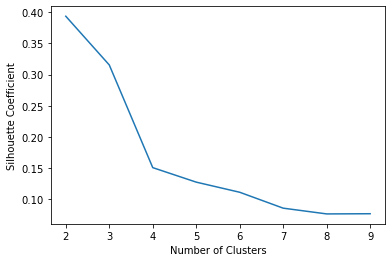

array([[2.        , 0.39373248],
       [3.        , 0.31548375],
       [4.        , 0.15052912],
       [5.        , 0.12723672],
       [6.        , 0.11096892],
       [7.        , 0.0854191 ],
       [8.        , 0.07618333],
       [9.        , 0.07648837]])

In [7]:
cluster_scores = get_cluster_scores_kmeans(X_scaled, np.arange(2, 9+1, 1), metrics.silhouette_score)
plt.plot(cluster_scores[:, 0], cluster_scores[:, 1])
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Coefficient')
plt.show()
display(cluster_scores)

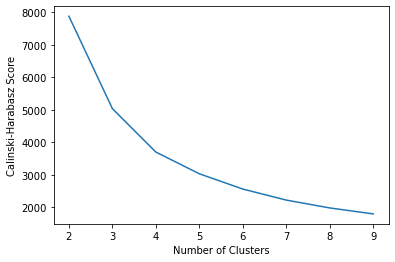

array([[2.00000000e+00, 7.88081390e+03],
       [3.00000000e+00, 5.03447526e+03],
       [4.00000000e+00, 3.69633820e+03],
       [5.00000000e+00, 3.02707617e+03],
       [6.00000000e+00, 2.55677357e+03],
       [7.00000000e+00, 2.21656394e+03],
       [8.00000000e+00, 1.97497150e+03],
       [9.00000000e+00, 1.79095317e+03]])

In [9]:
cluster_scores = get_cluster_scores_kmeans(X_scaled, np.arange(2, 9+1, 1), metrics.calinski_harabasz_score)
plt.plot(cluster_scores[:, 0], cluster_scores[:, 1])
plt.xlabel('Number of Clusters')
plt.ylabel('Calinski-Harabasz Score')
plt.show()
display(cluster_scores)

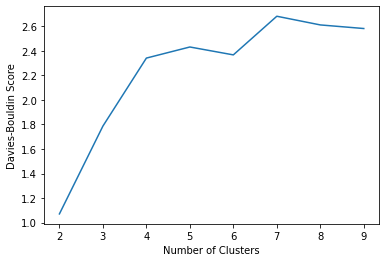

array([[2.        , 1.07074418],
       [3.        , 1.78651647],
       [4.        , 2.3409301 ],
       [5.        , 2.43137517],
       [6.        , 2.36703637],
       [7.        , 2.68197951],
       [8.        , 2.61122599],
       [9.        , 2.58188828]])

In [10]:
cluster_scores = get_cluster_scores_kmeans(X_scaled, np.arange(2, 9+1, 1), metrics.davies_bouldin_score)
plt.plot(cluster_scores[:, 0], cluster_scores[:, 1])
plt.xlabel('Number of Clusters')
plt.ylabel('Davies-Bouldin Score')
plt.show()
display(cluster_scores)

In [41]:
model = cluster.KMeans(n_clusters=K_labels, init='k-means++', random_state=42)
model.fit(X_scaled)
y_labels_pred = model.labels_
score = metrics.homogeneity_score(y_labels_joined, y_labels_pred)
np.round(score, 2)

0.54

In [42]:
model = cluster.KMeans(n_clusters=K_labels, init='k-means++', random_state=42)
model.fit(X_scaled)
y_labels_pred = model.labels_
score = metrics.completeness_score(y_labels_joined, y_labels_pred)
np.round(score, 2)

0.58

In [49]:
# K_labels = 6
model = cluster.KMeans(n_clusters=K_labels, init='k-means++', random_state=42)
model.fit(X_scaled)
y_labels_pred = model.labels_
score = metrics.adjusted_rand_score(y_labels_joined, y_labels_pred)
np.round(score, 2)

0.42

In [50]:
labels_data = pd.DataFrame()
labels_data['labels_true'] = y_labels_joined.reset_index(drop=True)
labels_data['labels_pred'] = pd.Series(y_labels_pred) + 1
labels_data.tail()

,labels_true,labels_pred
10294,2,2
10295,2,2
10296,2,2
10297,2,2
10298,2,2


<span style="font-size: 10pt">labels_true - изначальные метки активностей</span>
<ul style="font-size: 10pt">
    <li>1 — ходьба;</li>
    <li>2 — подъём;</li>
    <li>3 — спуск;</li>
    <li>4 — сидение;</li>
    <li>5 — стояние;</li>
    <li>6 — лежание.</li>
</ul>

In [51]:
pd.crosstab(labels_data.labels_true, labels_data.labels_pred, margins=True, margins_name='Total')

labels_pred,1,2,3,4,5,6,Total
labels_true,,,,,,,
1,0,903,0,742,77,0,1722
2,2,1242,0,295,5,0,1544
3,0,321,0,889,196,0,1406
4,451,1,91,0,0,1234,1777
5,566,0,0,0,0,1340,1906
6,330,5,1556,0,0,53,1944
Total,1349,2472,1647,1926,278,2627,10299


In [44]:
model = cluster.KMeans(n_clusters=2, init='k-means++', random_state=42)
model.fit(X_scaled)
y_labels_pred = model.labels_

In [47]:
labels_data = pd.DataFrame()
labels_data['labels_true'] = y_labels_joined.reset_index(drop=True)
labels_data['labels_pred'] = pd.Series(y_labels_pred) + 1
labels_data.tail()

,labels_true,labels_pred
10294,2,1
10295,2,1
10296,2,1
10297,2,1
10298,2,1


In [48]:
pd.crosstab(labels_data.labels_true, labels_data.labels_pred, margins=True, margins_name='Total')

labels_pred,1,2,Total
labels_true,,,
1,1722,0,1722
2,1536,8,1544
3,1406,0,1406
4,3,1774,1777
5,0,1906,1906
6,12,1932,1944
Total,4679,5620,10299


In [71]:
labels_true_2 = labels_data['labels_true'].apply(lambda label_true: 1 if label_true in [1, 2, 3] else 2).to_numpy()
score = metrics.completeness_score(labels_true_2, y_labels_pred)
np.round(score, 2)

0.41

In [72]:
labels_true_2 = labels_data['labels_true'].apply(lambda label_true: 1 if label_true in [1, 2, 3] else 2).to_numpy()
score = metrics.homogeneity_score(labels_true_2, y_labels_pred)
np.round(score, 2)

0.99

In [62]:
hc_model = cluster.AgglomerativeClustering(n_clusters=2)
hc_model.fit(X_scaled)
hc_labels_pred = hc_model.labels_ + 1

score = metrics.completeness_score(labels_true_2, hc_labels_pred)
np.round(score, 2)

1.0